# Example notebook for the functions contained into plot.py()

## Bands

In [1]:
from CRYSTALpytools.crystal_io import Properties_output
import CRYSTALpytools.plot as cfplt

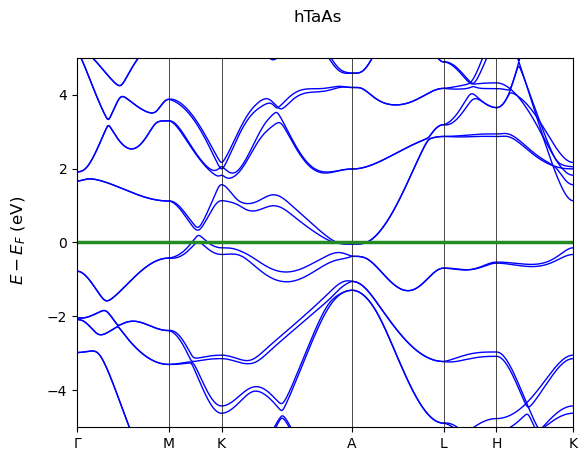

In [2]:
Data = Properties_output().read_electron_band('data/hTaAs_lda_bande44.BAND')
cfplt.plot_electron_band(Data, energy_range=[-5, 5], k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], title='hTaAs')

You can also change the defaults unit, bands color, line style, line width, range of k points, color of the Fermi level, and figsize as follows:

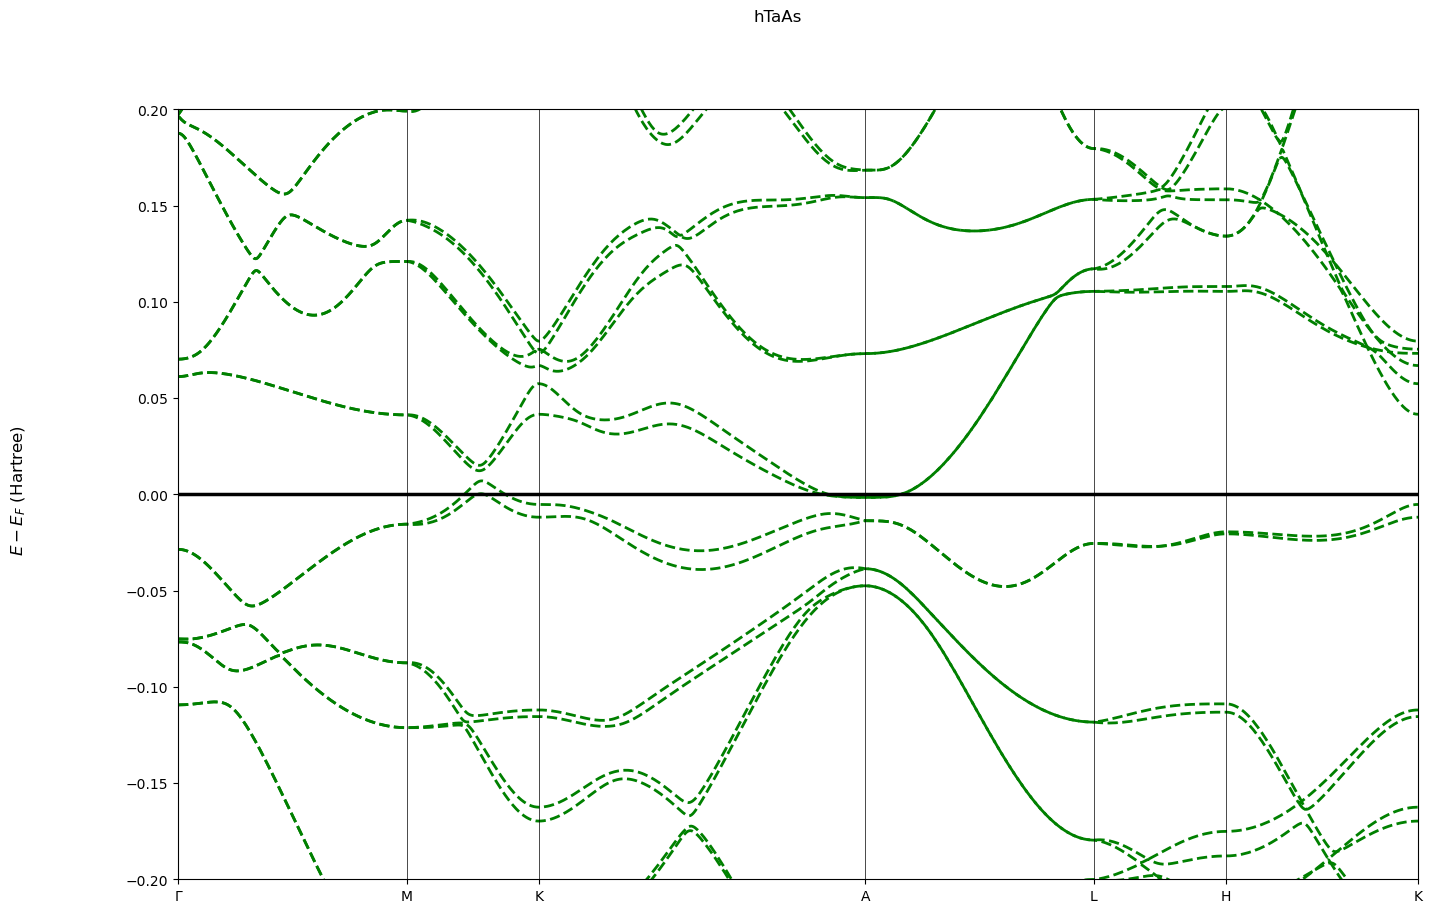

In [3]:
cfplt.plot_electron_band(Data, unit='Hartree', energy_range=[-0.2, 0.2], k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                         title='hTaAs', linestl='--',linewidth=2, figsize=(16,10), color='green', fermi='black')

### Multiple Band Structures

With the plot_cry_bands() fuction you can plot multiple band structures in two ways: Overlapping the structures, and side by side plots

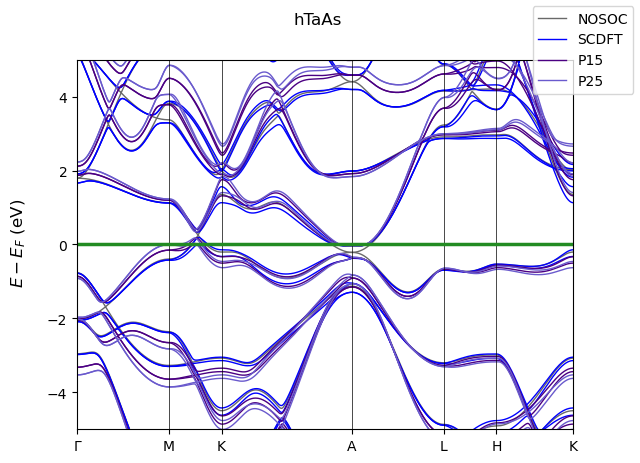

In [4]:
Data = ['data/hTaAs_lda_noso_bande.band', 'data/hTaAs_lda_bande44.BAND',
        'data/hTaAs_lda_P15_bande.band', 'data/hTaAs_lda_P25_bande.band']
for index, file in enumerate(Data):
    Data[index] = Properties_output().read_electron_band(file)

cfplt.plot_electron_band(Data, mode='multi', energy_range=[-5, 5],
                         k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                         title='hTaAs', labels=['NOSOC', 'SCDFT', 'P15', 'P25'])

As for the single band plots the default bands color, line style, line width, range of k points, Fermi level color, and figsize:

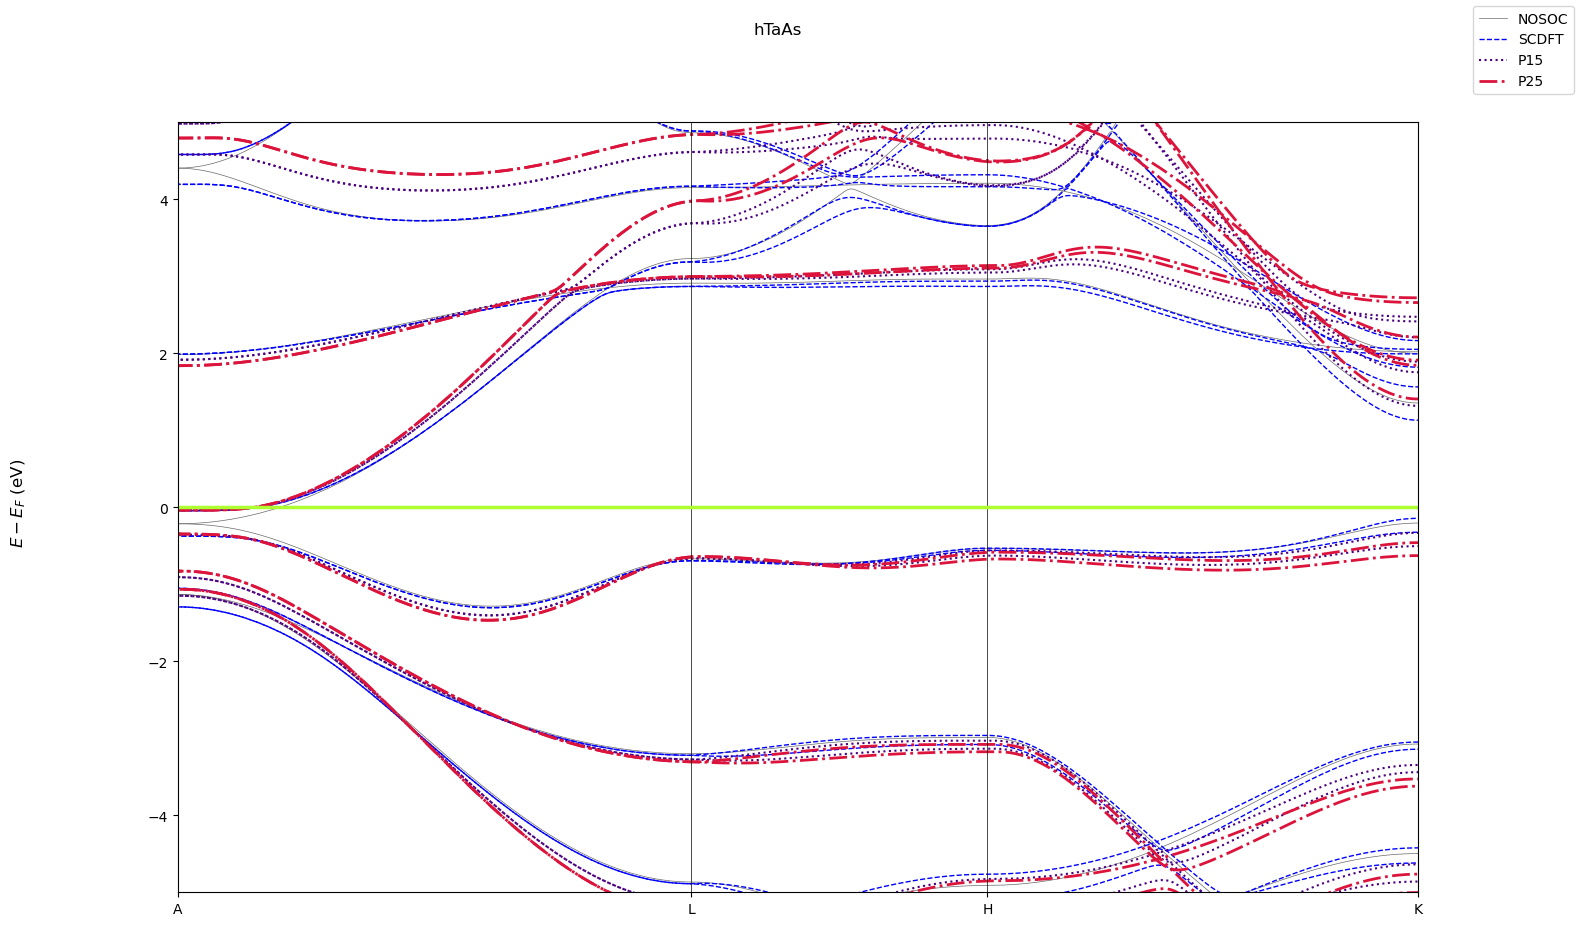

In [5]:
cfplt.plot_electron_band(Data, mode='multi', energy_range=[-5, 5],
                         k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                         title='hTaAs', labels=['NOSOC', 'SCDFT', 'P15', 'P25'],
                         color=['dimgrey', 'blue', 'indigo', 'crimson'], fermi='greenyellow',
                         k_range=['A', 'K1'], linestl=['-','--','dotted','dashdot'],
                         linewidth=[0.5,1,1.5,2], figsize=(16,10))

#### Side by Side Plots

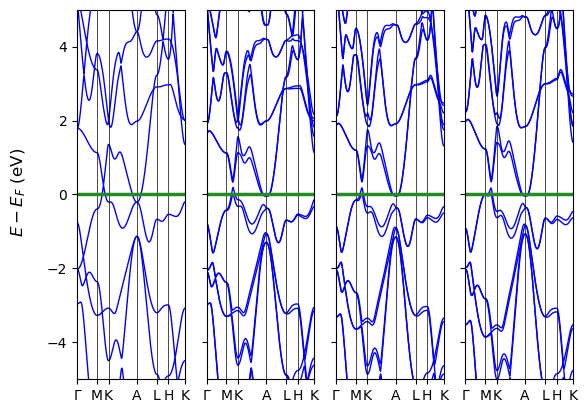

In [6]:
cfplt.plot_electron_band(Data, mode='compare', energy_range=[-5, 5],
                         k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'])

As seen for the overlapped structures, we can change bands color, line style, line width, color of the fermi level and figsize. In addition you'll be able to change the display scheme 

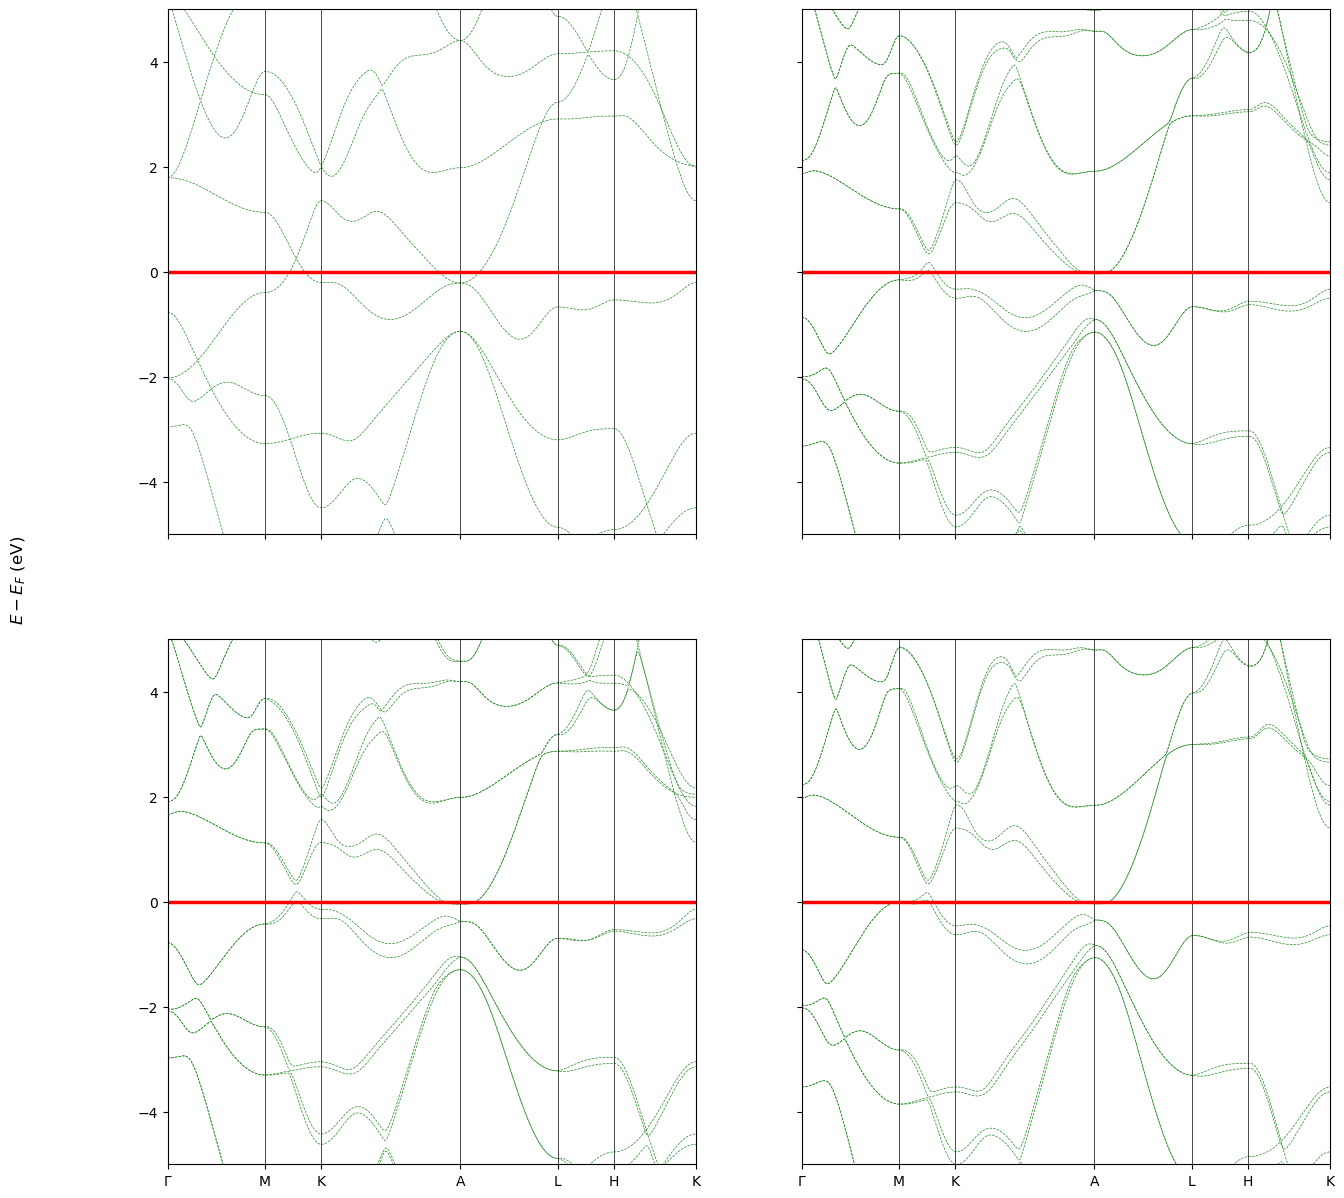

In [7]:
cfplt.plot_electron_band(Data, mode='compare',energy_range=[-5, 5],
                         k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                         color='forestgreen', fermi='red', linestl='--',
                         linewidth=0.5, figsize=(15,15), scheme=(2,2))

### Doss

The plot.py will also give you the opportunity to plot a the Density of States of the system using the following sintax:

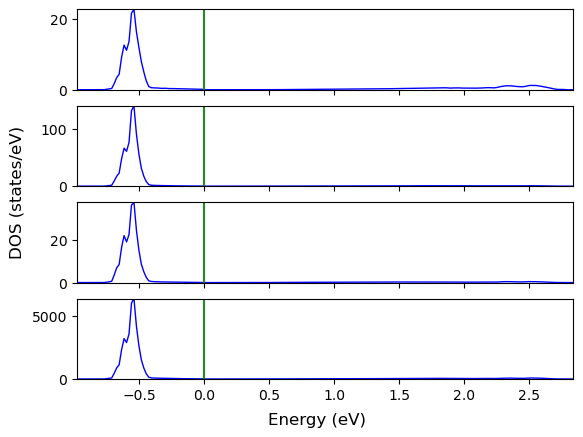

In [8]:
Data=Properties_output().read_electron_dos('data/doss_96.DOSS')
cfplt.plot_electron_dos(Data)

As it happens fort the band plot also the DOSS plot can be further customized as follows:

/home/e89/e89/hyz20ic/app/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/plot.py:1015: UserWarning: When overlap is false color should be a string!
  fig = plot_cry_doss(doss, color=color, fermi=fermi, overlap=overlap,


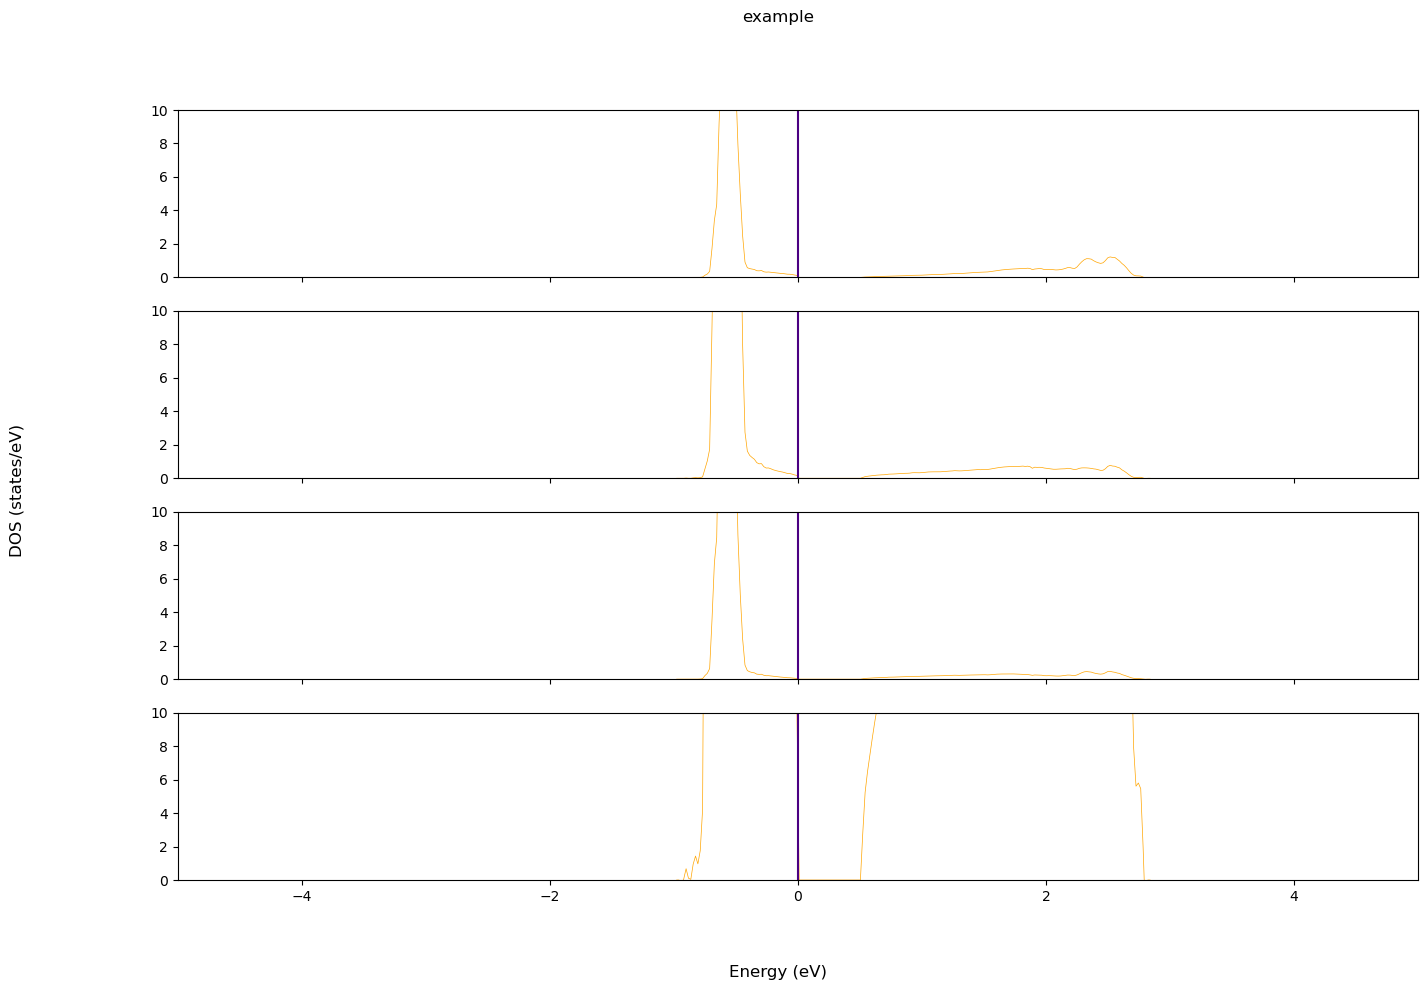

In [9]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16,10), linestl=['-','--','dotted','dashdot'],
                        linewidth=0.5, energy_range=[-5,5], dos_range=[0,10], color='orange', fermi='indigo' )

Furthermore you can also plot a selected number of projections whit a list of numbers where 1 will correspond to the first projection in the file

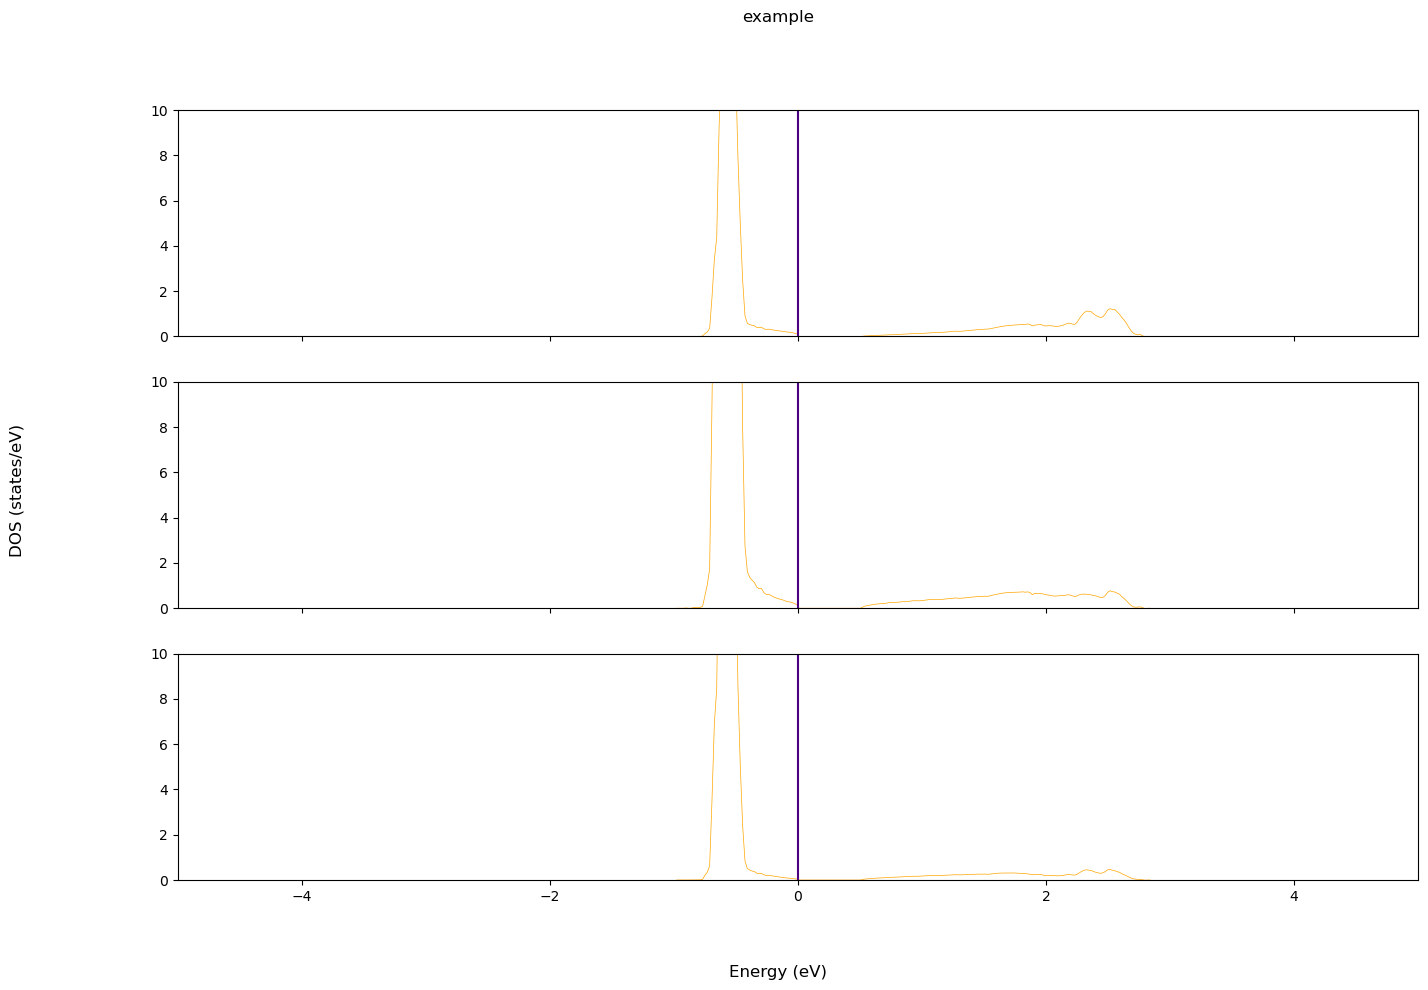

In [10]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16,10),
                        linestl=['-','--','dotted','dashdot'],
                        linewidth=0.5, energy_range=[-5,5], dos_range=[0,10],
                        color='orange', fermi='indigo', prj=[1,2,3])

If you prefer all of the projection can be plotted into a single plot as follows:

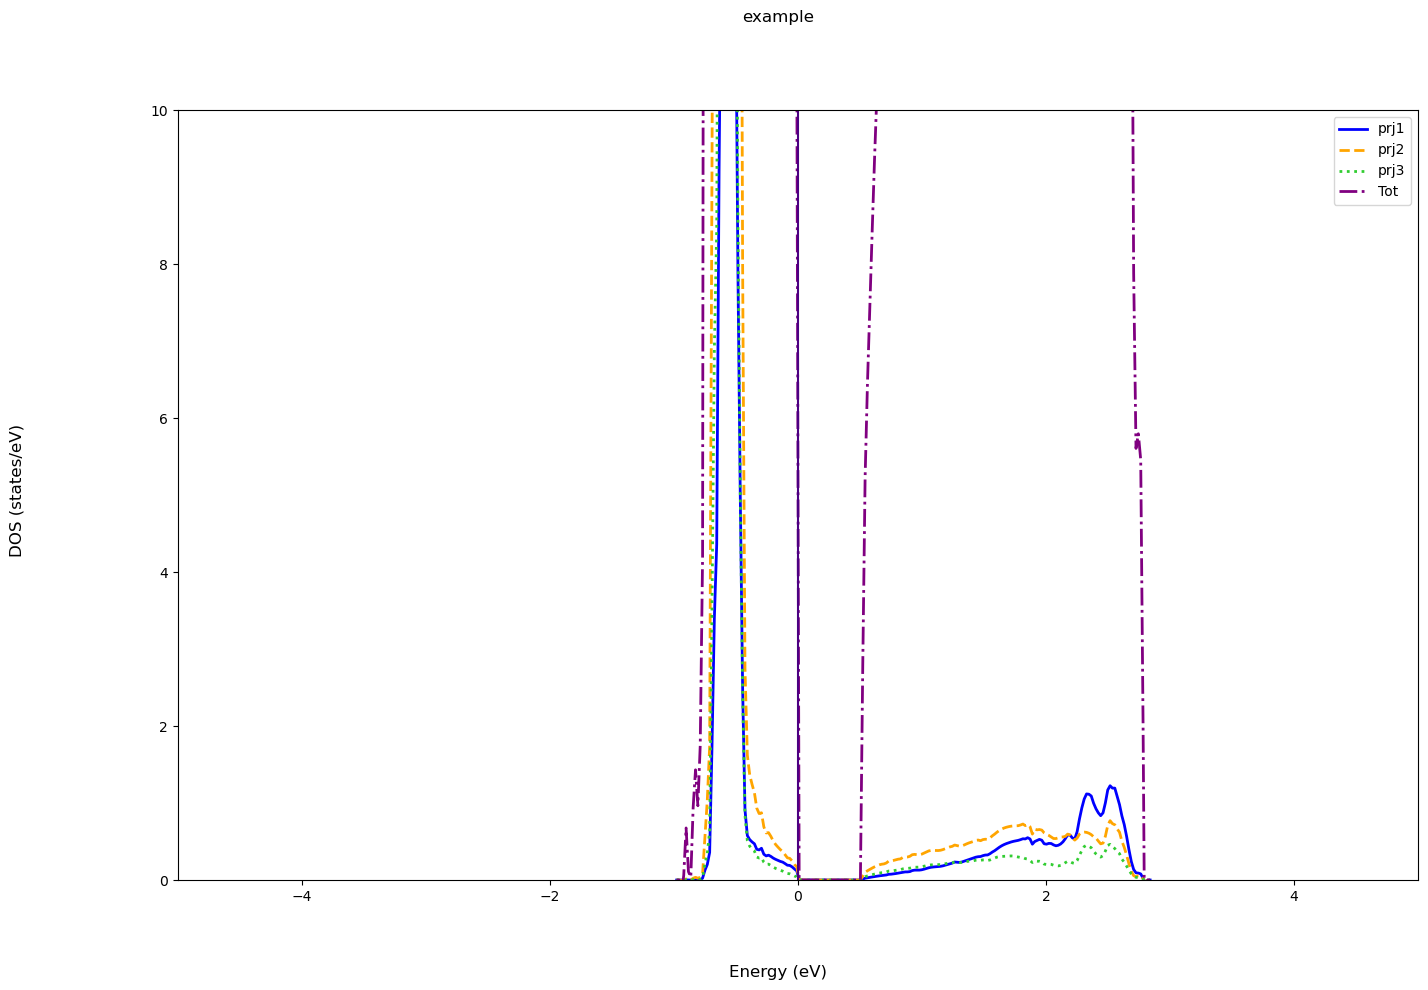

In [11]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16,10),
                        linestl=['-','--','dotted','dashdot'], linewidth=2,
                        energy_range=[-5,5], dos_range=[0,10],
                        color=['blue', 'orange', 'limegreen','purple'],
                        fermi='indigo', overlap=True,
                        labels=['prj1', 'prj2', 'prj3', 'Tot'] )

As before you can also plot a restricted number of projections: 

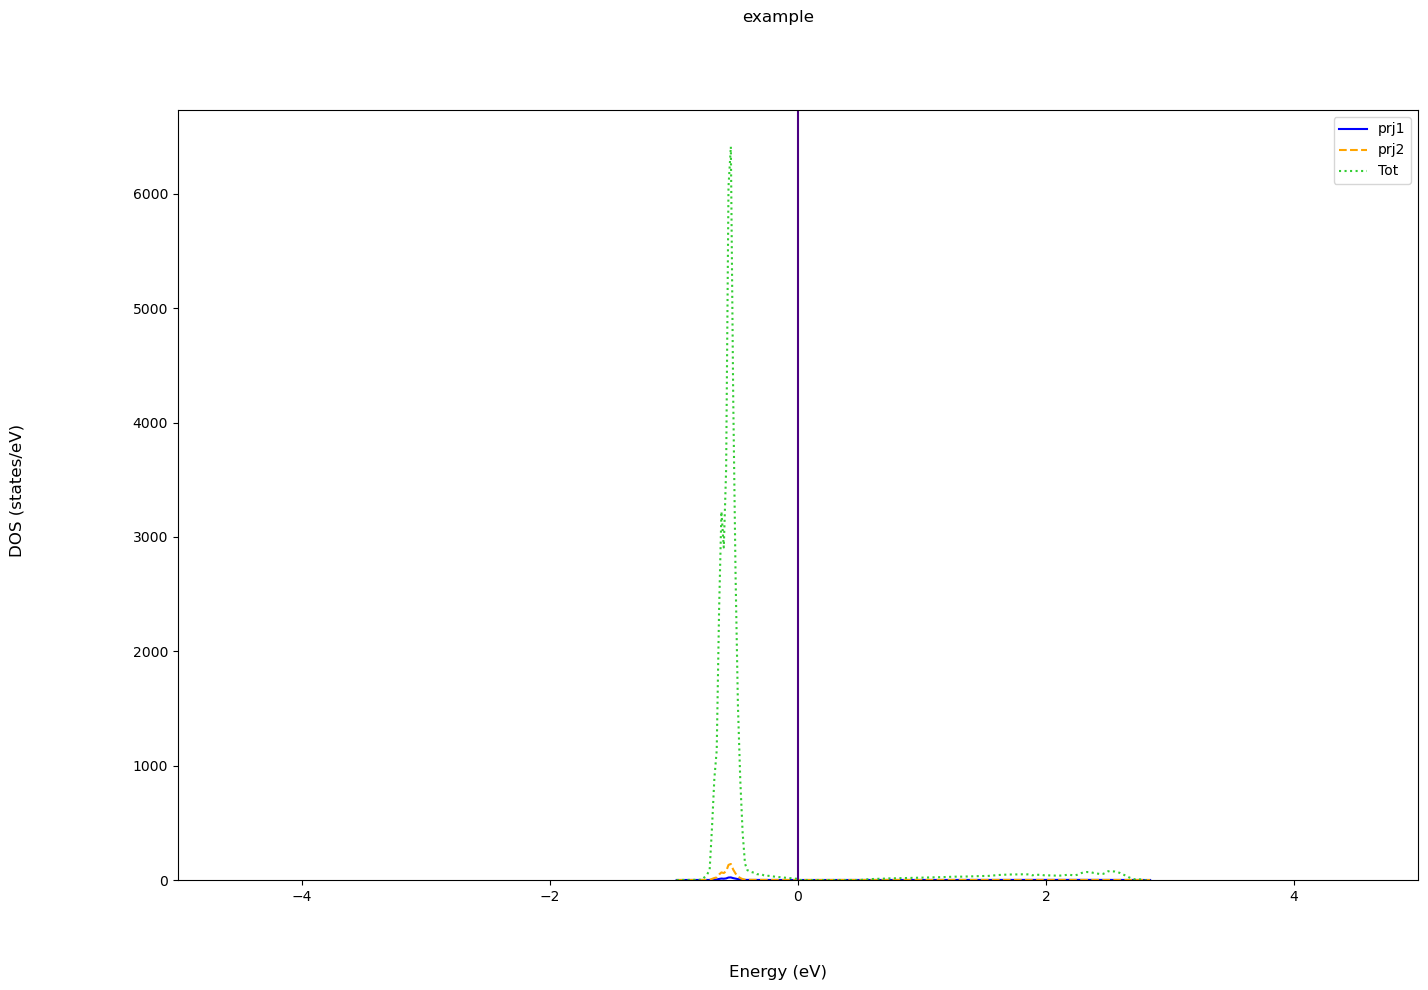

In [12]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16, 10),
                        linestl=['-', '--', 'dotted'], linewidth=1.5,
                        energy_range=[-5, 5], color=['blue', 'orange', 'limegreen'],
                        fermi='indigo', overlap=True, labels=['prj1', 'prj2', 'Tot'],
                        prj=[1,2,4])

In case of an open shell calculations you can use the beta (default: 'up') keyword to customize your plot as follows:

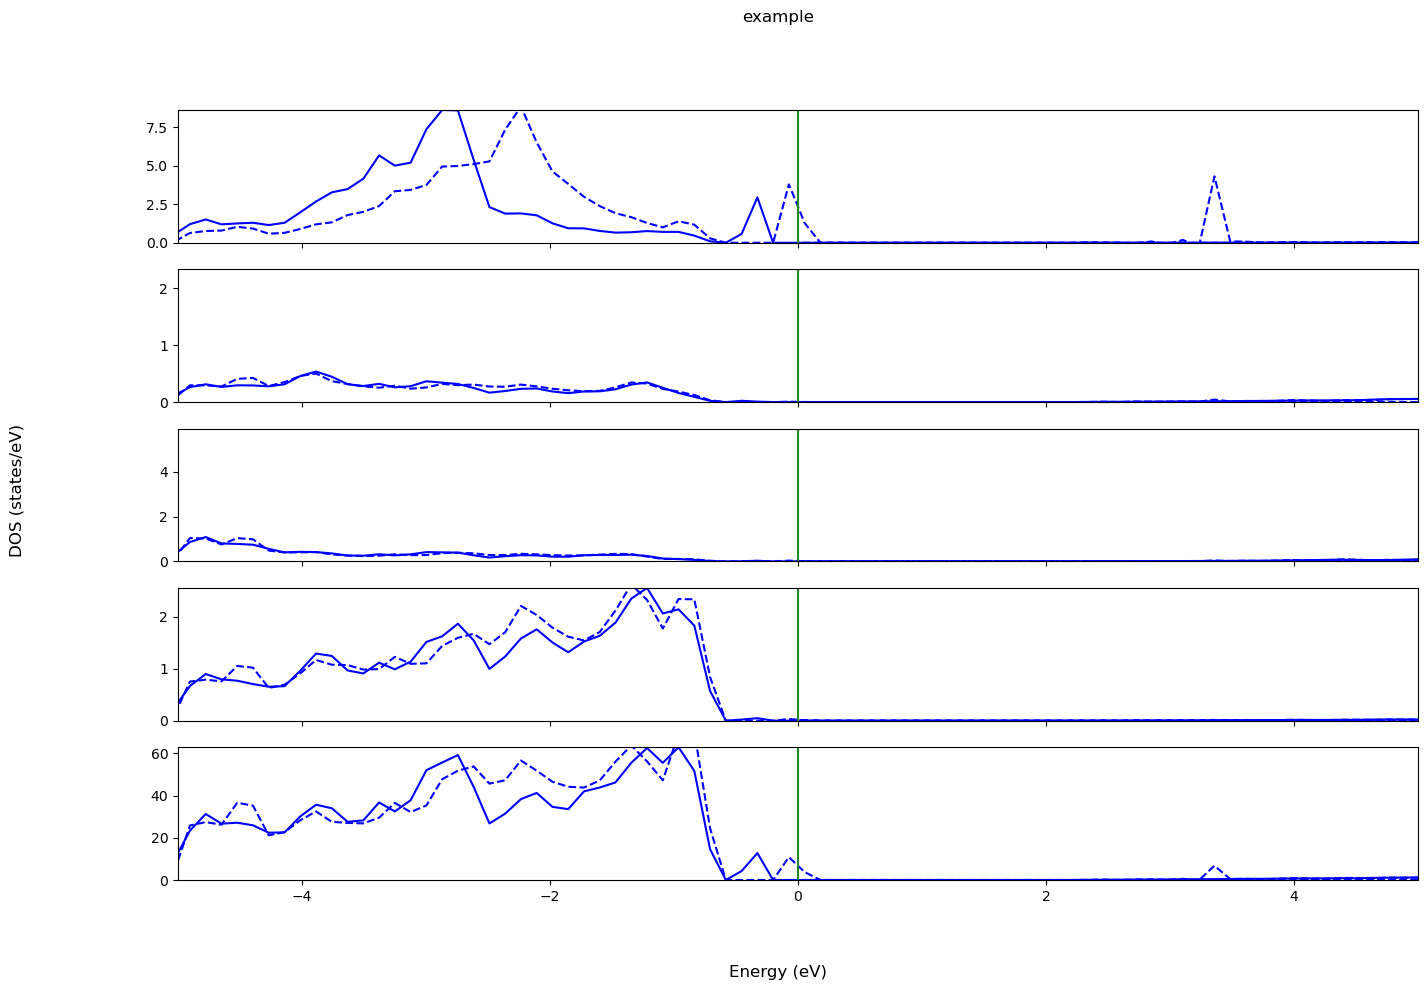

In [13]:
Data=Properties_output().read_electron_dos('data/doss_ito-cu.DOSS')
cfplt.plot_electron_dos(Data, title='example', figsize=(16, 10), linewidth=1.5,
                        energy_range=[-5, 5])

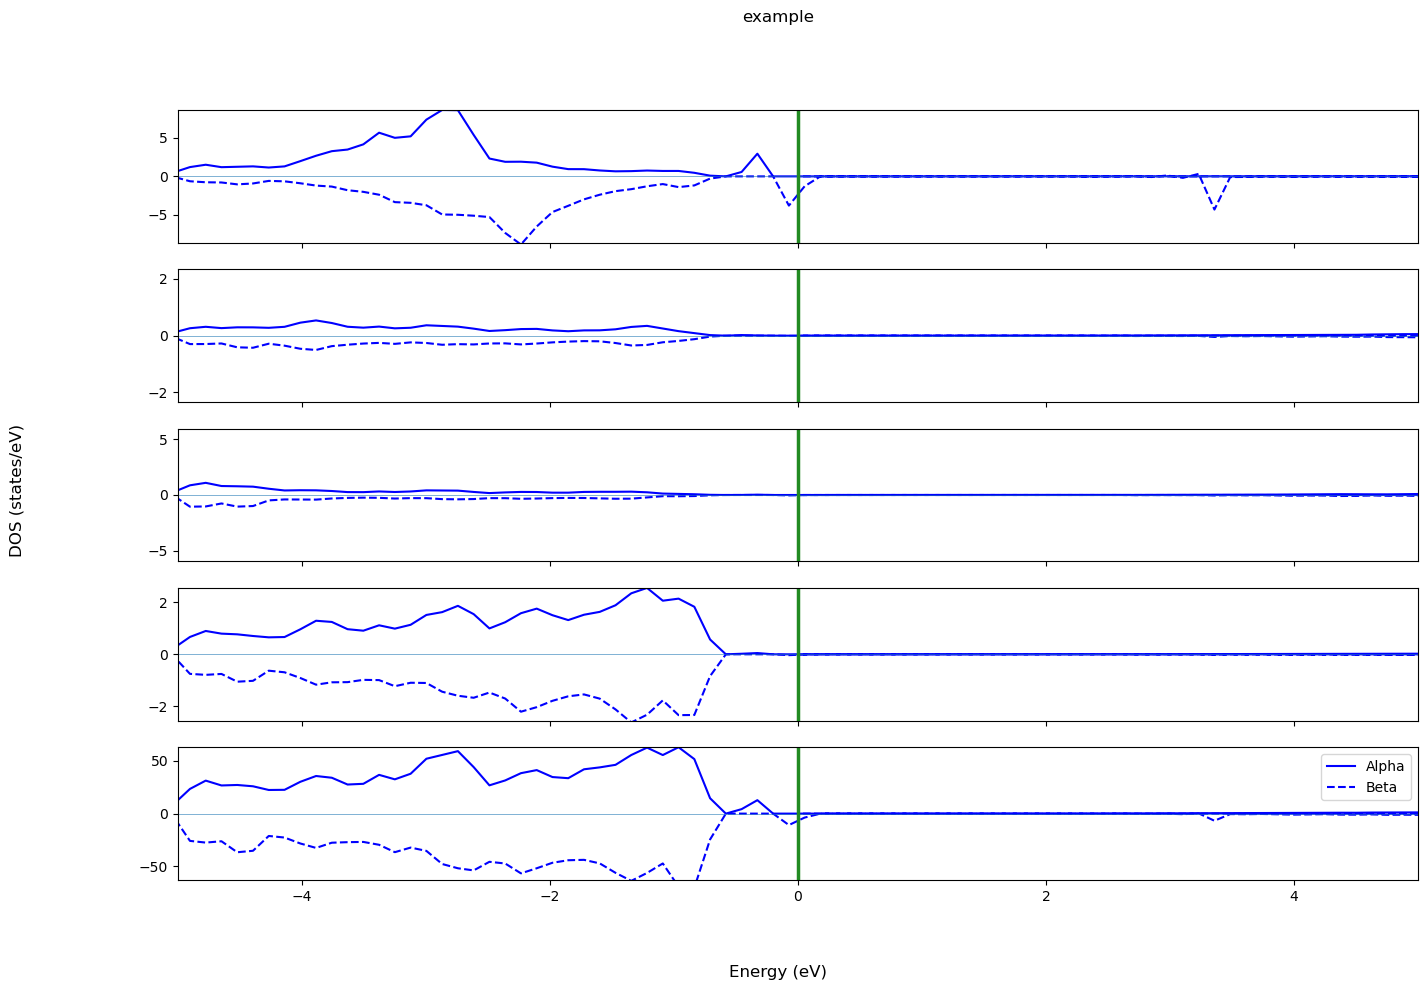

In [14]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16, 10), linewidth=1.5,
                        energy_range=[-5, 5], beta='down')

The same option is also available for overlap=True:

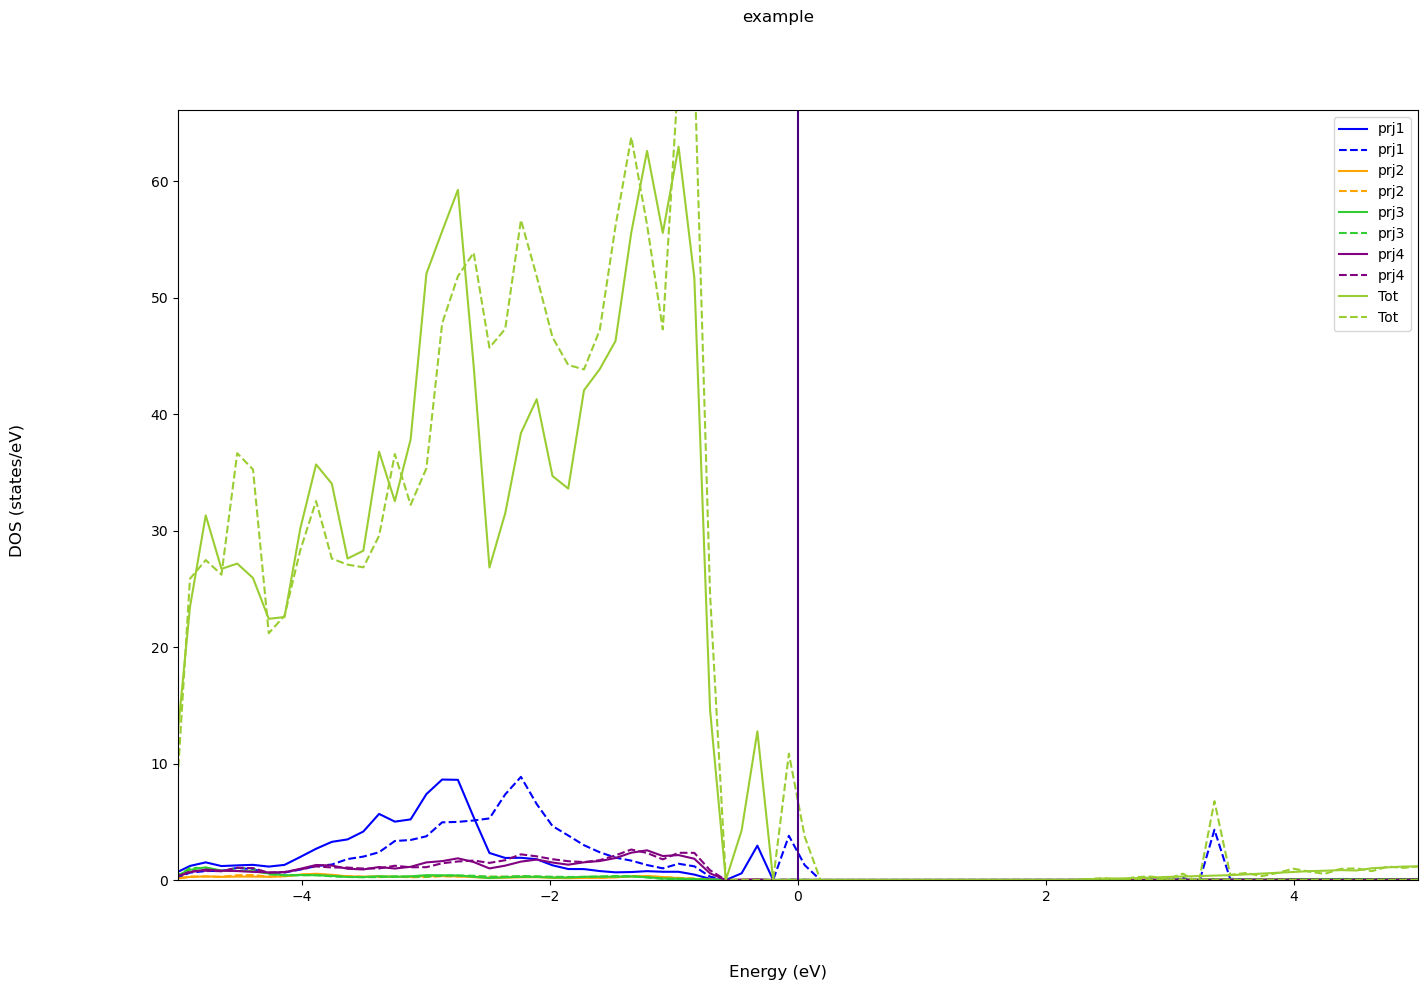

In [15]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16, 10),
                        linestl=['-', '--', 'dotted', 'dashdot', '-'], linewidth=1.5,
                        energy_range=[-5, 5],
                        color=['blue', 'orange', 'limegreen', 'purple', 'yellowgreen'],
                        fermi='indigo', overlap=True,
                        labels=['prj1', 'prj2', 'prj3', 'prj4','Tot'] )

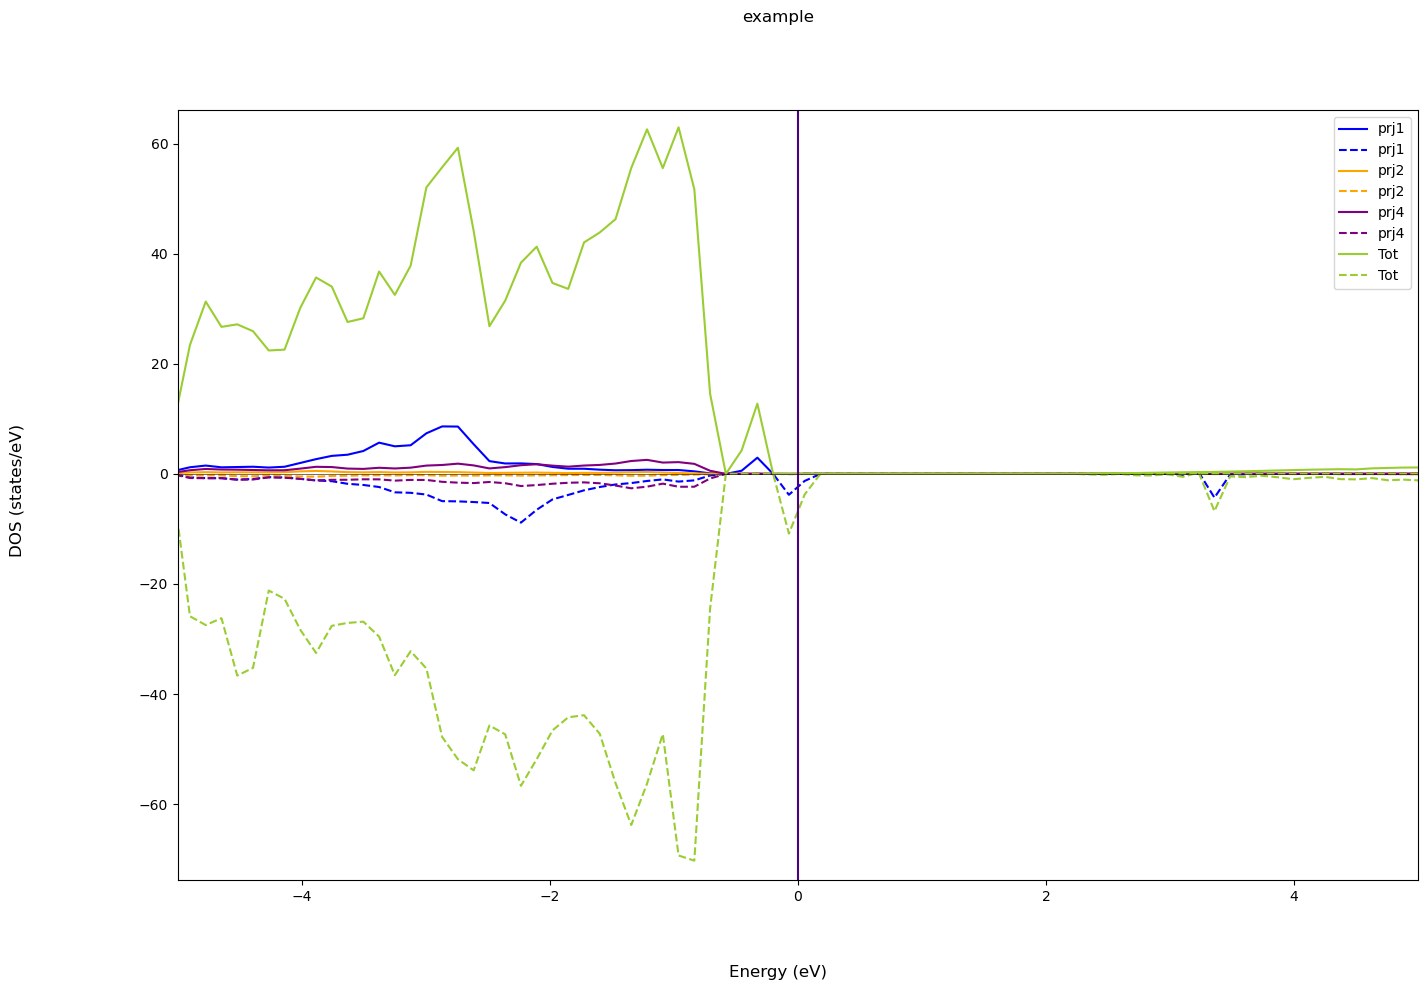

In [16]:
cfplt.plot_electron_dos(Data, title='example', figsize=(16, 10),
                        linestl=['-', '--', 'dashdot', '-'], linewidth=1.5,
                        energy_range=[-5, 5],
                        color=['blue', 'orange', 'purple', 'yellowgreen'],
                        fermi='indigo', overlap=True, beta='down',
                        labels=['prj1', 'prj2', 'prj4','Tot'], prj=[1,2,4,5])

### Electronic Structure

With the plot_electron_banddos() function the user will be able to plot a Band structure along side a DOSS plot as follows:

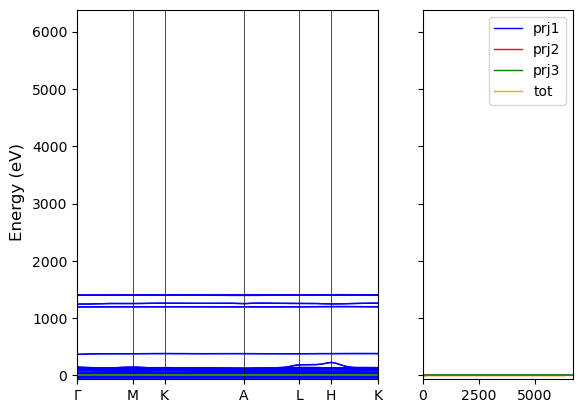

In [17]:
band_data = Properties_output().read_electron_band('data/hTaAs_lda_bande44.BAND')
doss_data = Properties_output().read_electron_dos('data/doss_96.DOSS')

cfplt.plot_electron_banddos(band_data, doss_data,
                            k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                            linestl_dos=['-', '-', '-', '-'],
                            labels=['prj1', 'prj2', 'prj3', 'tot'],
                            color_dos=['blue', 'red', 'green', 'orange'])

As shown for other functions the user can select an energy range and further customize the plot as follows:

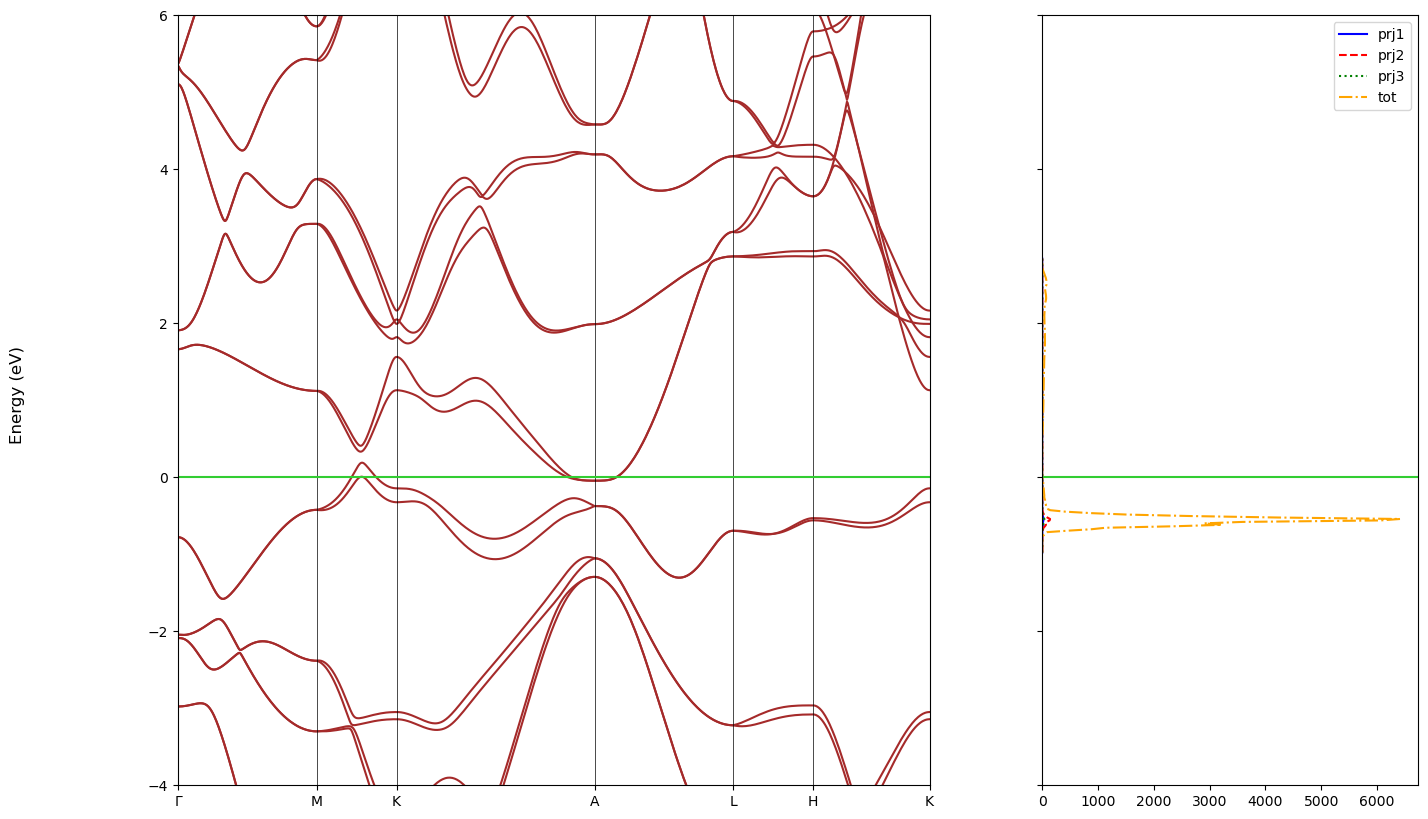

In [18]:
cfplt.plot_electron_banddos(band_data, doss_data,
                            k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                            linestl_dos=['-', '--', 'dotted', 'dashdot'],
                            labels=['prj1', 'prj2', 'prj3', 'tot'],
                            color_dos=['blue', 'red', 'green', 'orange'],
                            color_band='brown', fermi='limegreen', energy_range=[-4,6],
                            linestl_band='-', linewidth=1.5, figsize=(16,10))

Furthermore you can plot a selection of projections as it happened in the plot_cry_doss() function

/home/e89/e89/hyz20ic/app/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/plot.py:1517: UserWarning: You have a number of linestl_doss element greater than the number of projection required(prj elements)!
  fig = plot_cry_es(bands=bands, doss=doss, k_labels=k_labels, color_bd=color_band,


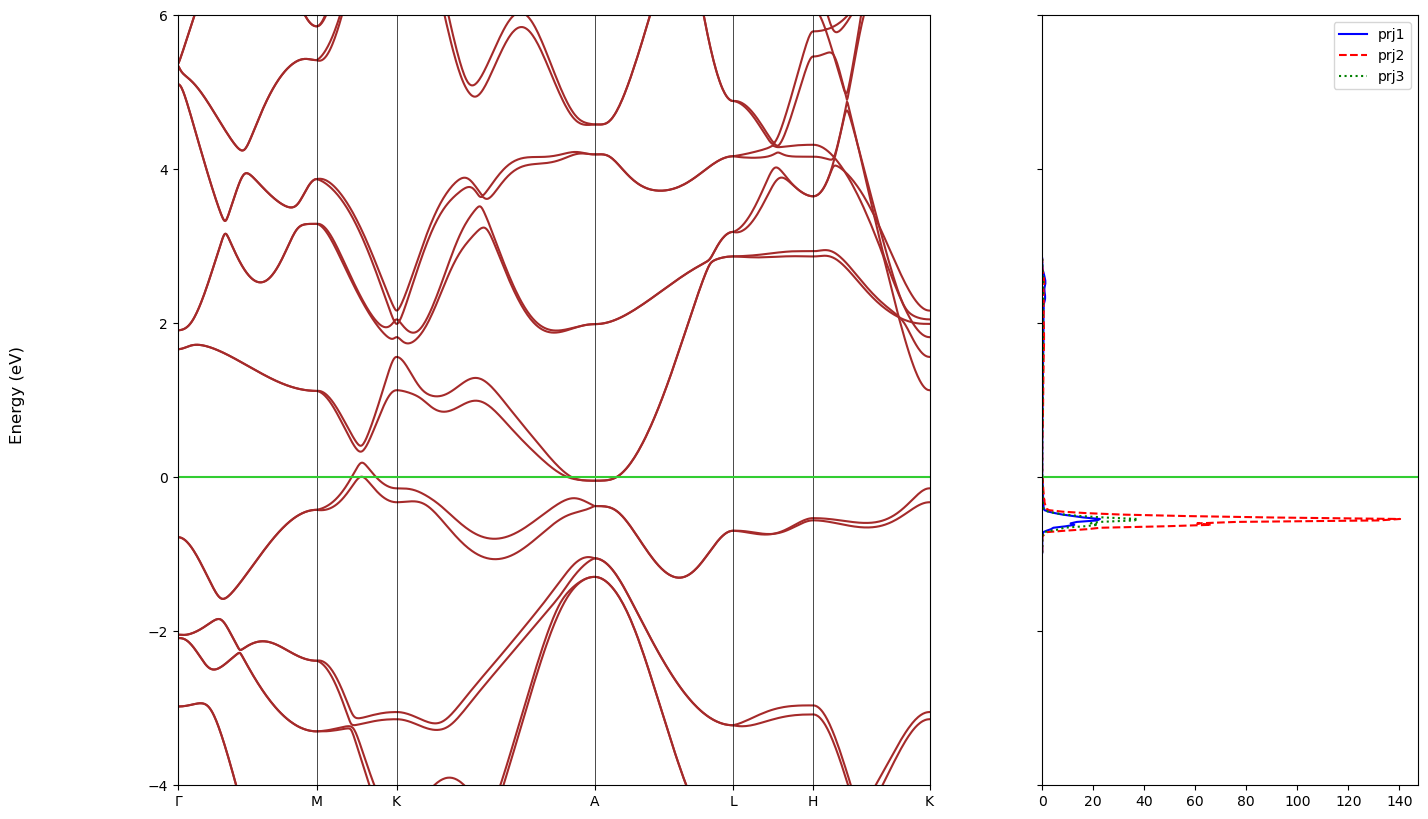

In [19]:
cfplt.plot_electron_banddos(band_data, doss_data,
                            k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                            labels=['prj1', 'prj2', 'prj3', 'tot'],
                            dos_prj=[1,2,3], linestl_dos=['-', '--', 'dotted'],
                            color_dos=['blue', 'red', 'green'],
                            color_band='brown', fermi='limegreen', linestl_band='-',
                            energy_range=[-4, 6], linewidth=1.5, figsize=(16, 10))

At last, the user will be able to restrict the density of state to a maximum range:

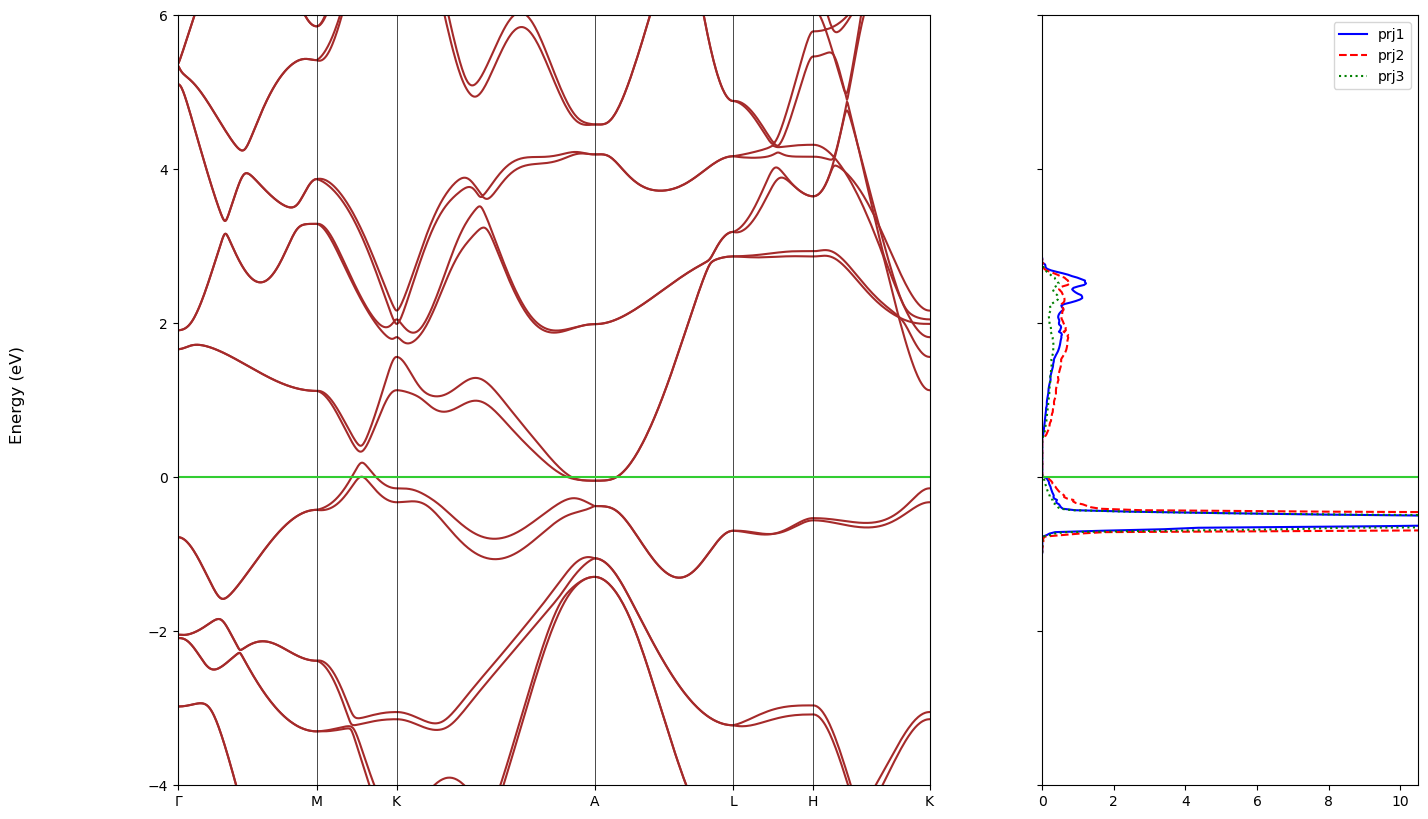

In [20]:
cfplt.plot_electron_banddos(band_data, doss_data,
                            k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
                            labels=['prj1', 'prj2', 'prj3', 'tot'],
                            dos_max_range=10, dos_prj=[1, 2, 3],
                            linestl_dos=['-', '--', 'dotted'],
                            color_dos=['blue', 'red', 'green'],
                            color_band='brown', fermi='limegreen', linestl_band='-',
                            energy_range=[-4, 6], linewidth=1.5, figsize=(16, 10))